In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from tsshapelet import Shapelet
from dtw import *

## Vector

In [69]:
df = pd.read_csv("GrantSkippingWalking.csv", skiprows = lambda x: x<=9, index_col=False)

df['vm'] = (df['Accelerometer X']**2 + df['Accelerometer Y']**2 + df['Accelerometer Z']**2)**.5

## Skipping

<AxesSubplot: >

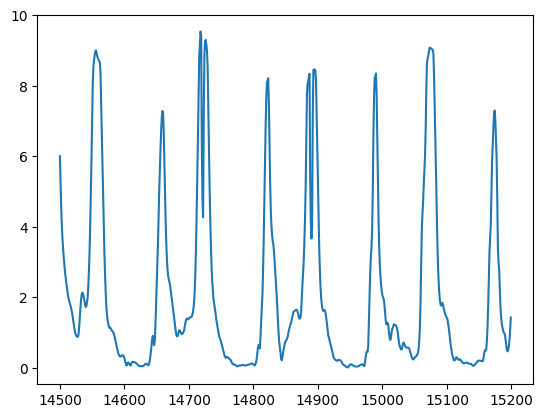

In [70]:
df['vm'][14500:15200].plot()

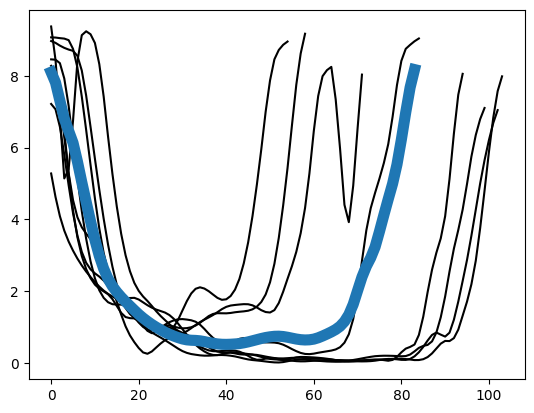

In [71]:
skip_data = df['vm'][14500:15200]
skip_shape = Shapelet(skip_data)
skip_shape.series = skip_shape.original
skip_shape.smooth(3)
skip_shape.candidate_extraction(extraction='peak', min_dist=15, thres=0.8, max_dist=120)
skip_shape.shapelet_selection(barycenter='interpolated')
for arr in skip_shape.candidates:
    pp.plot(arr, color = 'black')
s_rs = skip_shape.shapelets[0]
pp.plot(s_rs, lw=8)

## Walking

<AxesSubplot: >

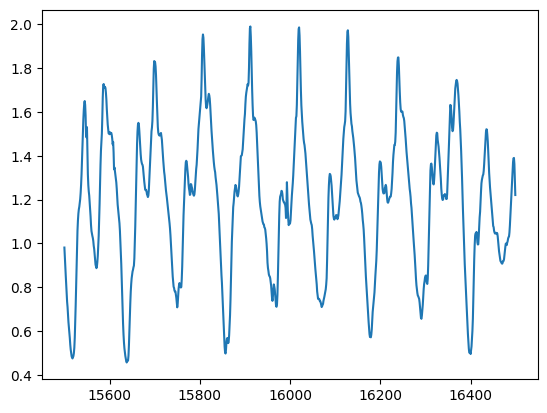

In [72]:
df['vm'][15500:16500].plot()

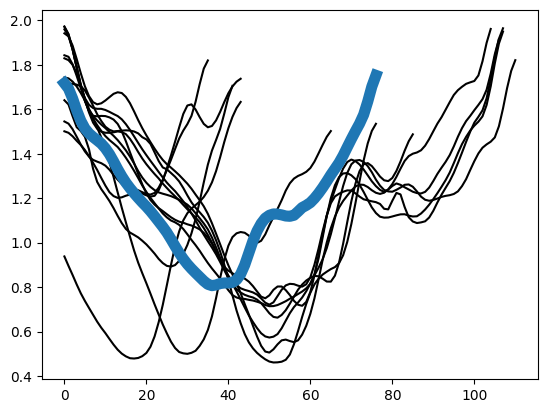

In [73]:
walk_data = df['vm'][15500:16500]
walk_shape = Shapelet(walk_data)
walk_shape.series = walk_shape.original
walk_shape.smooth(3)
walk_shape.candidate_extraction(extraction='peak', min_dist=15, thres=0.8, max_dist=120)
walk_shape.shapelet_selection(barycenter='interpolated')
for arr in walk_shape.candidates:
    plt.plot(arr, color = 'black')
w_rs = walk_shape.shapelets[0]
plt.plot(w_rs, lw=8)

## Waliking and Skipping

<AxesSubplot: >

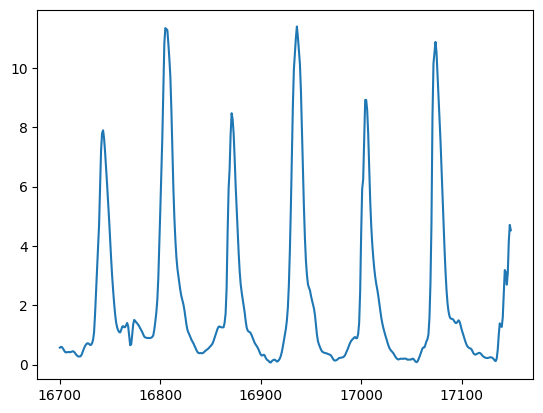

In [74]:
df['vm'][16700:17150].plot()

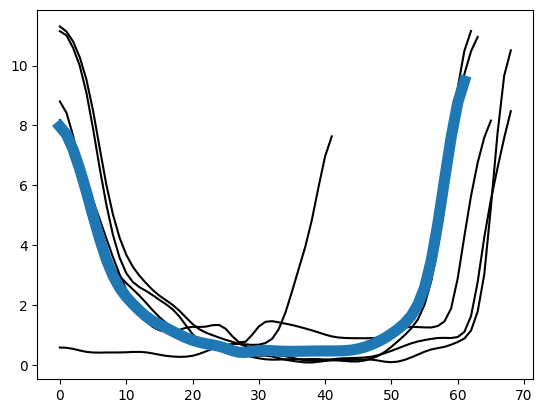

In [75]:
ws_data = df['vm'][16700:17150]
ws_shape = Shapelet(ws_data)
ws_shape.series = ws_shape.original
ws_shape.smooth(3)
ws_shape.candidate_extraction(extraction='peak', min_dist=15, thres=0.8, max_dist=120)
ws_shape.shapelet_selection(barycenter='interpolated')
for arr in ws_shape.candidates:
    plt.plot(arr, color = 'black')
ws_rs = ws_shape.shapelets[0]
plt.plot(ws_rs, lw=8)

# Average the candidates

DTW alignment object of size (query x reference): 77 x 84


<AxesSubplot: xlabel='Index', ylabel='Query value'>

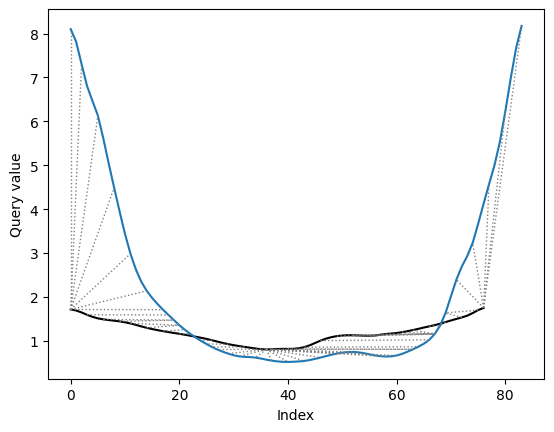

In [76]:
alignment = dtw(w_rs, s_rs, keep_internals=True)
print(alignment)
alignment.plot(type="twoway")

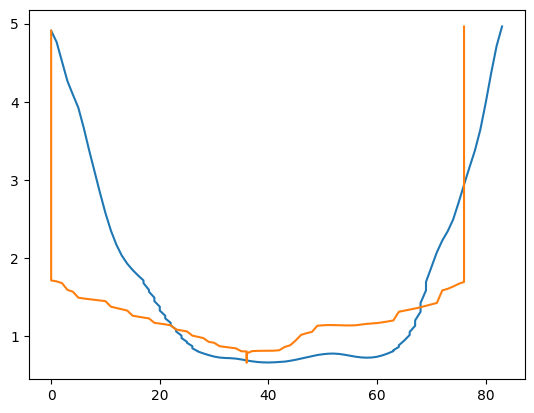

In [104]:
reference = alignment.reference
query = alignment.query
# # unwarped
# plt.plot(reference)
# plt.plot(query)
# plt.plot(alignment.index1,reference[alignment.index2])
# plt.plot(alignment.index2,query[alignment.index1]) 
# plt.plot(alignment.index2,reference[alignment.index2])   

plt.plot(alignment.index2,(query[alignment.index1] + reference[alignment.index2]) / 2) 
plt.plot(alignment.index1,(query[alignment.index1] + reference[alignment.index2]) / 2) 





In [79]:
from pprint import pprint

pprint(vars(alignment))

{'M': 84,
 'N': 77,
 'costMatrix': array([[  6.38347266,  12.4789352 ,  18.0678619 , ..., 126.11766398,
        132.07680551, 138.53338477],
       [ 12.79084453,  18.59829693,  23.68068781, ..., 125.1785557 ,
        131.16159643, 137.64207489],
       [ 19.24284721,  24.76228948,  29.33814453, ..., 123.45059822,
        129.47826975, 136.00337903],
       ...,
       [518.70068533, 503.48339802, 471.5886736 , ...,  88.08894008,
         94.1306123 , 100.66972225],
       [525.0994364 , 509.59413896, 477.19287872, ...,  87.34678714,
         93.32120708,  99.79306475],
       [531.44758118, 515.6542736 , 482.74647754, ...,  86.85499241,
         92.77880604,  99.20005742]]),
 'directionMatrix': array([[-2147483648,           2,           2, ...,           2,
                  2,           2],
       [          3,           3,           3, ...,           2,
                  2,           2],
       [          3,           3,           3, ...,           2,
                  2,          